# <center>Foodie: A Multiclass Food Classification Model</center>

---
 


### __Problem Statement__
Food-101 is a challenging vision problem, but everyone can relate to it.  Recent SoTA is ~80% top-1, 90% top-5.  These approaches rely on lots of TTA, large networks and  even novel architectures.

Train a decent model >85% accuracy for top-1 for the test set, using a ResNet50 or smaller network with a reasonable set of augmentations. 

### **Download Food-101 Dataset**

Let us start by downloading Food-101 dataset from http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

We can download the content using `wget` unix command.

In [ ]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

--2020-07-16 18:50:53--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2020-07-16 18:50:54--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  10.7MB/s    in 8m 3s   

2020-07-16 18:58:58 (9.86 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



Now we shall extract the tar.gz file using `tar` command.

In [ ]:
!tar xzvf food-101.tar.gz

### **Description of the Dataset**

This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.


### Structure of the Dataset

In [ ]:
!ls food-101

images	license_agreement.txt  meta  README.txt


`images` folder contains the food images of respective class

In [ ]:
!ls food-101/images

apple_pie	    eggs_benedict	     onion_rings
baby_back_ribs	    escargots		     oysters
baklava		    falafel		     pad_thai
beef_carpaccio	    filet_mignon	     paella
beef_tartare	    fish_and_chips	     pancakes
beet_salad	    foie_gras		     panna_cotta
beignets	    french_fries	     peking_duck
bibimbap	    french_onion_soup	     pho
bread_pudding	    french_toast	     pizza
breakfast_burrito   fried_calamari	     pork_chop
bruschetta	    fried_rice		     poutine
caesar_salad	    frozen_yogurt	     prime_rib
cannoli		    garlic_bread	     pulled_pork_sandwich
caprese_salad	    gnocchi		     ramen
carrot_cake	    greek_salad		     ravioli
ceviche		    grilled_cheese_sandwich  red_velvet_cake
cheesecake	    grilled_salmon	     risotto
cheese_plate	    guacamole		     samosa
chicken_curry	    gyoza		     sashimi
chicken_quesadilla  hamburger		     scallops
chicken_wings	    hot_and_sour_soup	     seaweed_salad
chocolate_cake	    hot_dog		     shrimp_and_grits
chocolate_mousse    huevo

In [ ]:
!ls food-101/meta

classes.txt  labels.txt  test.json  test.txt  train.json  train.txt


`meta` folder contains the above files

`classes.txt` contains all the classes of the food

`labels.txt` contains the food labels in the dataset

`train.txt` contains the list of training images

`test.txt` contains the list of testing images

### **Visualize the data**

Let's take a peek into the data. 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import os


%matplotlib inline

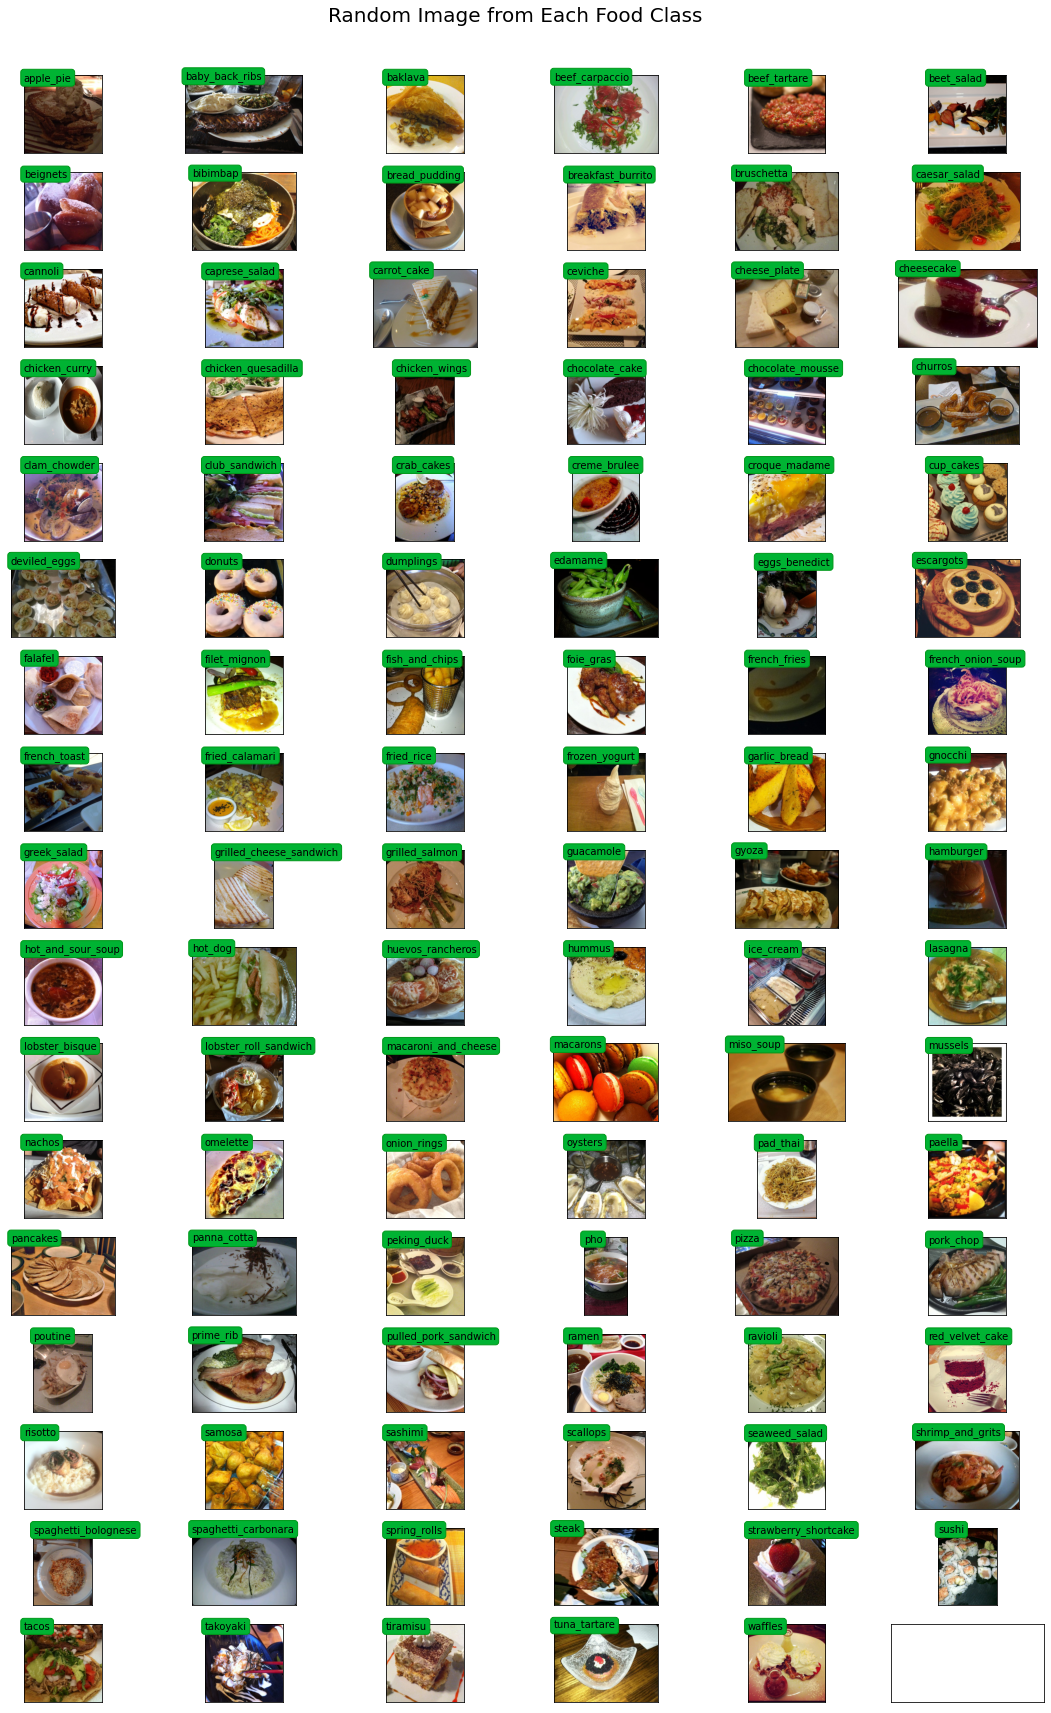

In [ ]:
root_dir = 'food-101/images/'
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, frameon=False, figsize=(15, 25))
fig.suptitle('Random Image from Each Food Class', fontsize=20)
sorted_food_dirs = sorted(os.listdir(root_dir))
for i in range(rows):
    for j in range(cols):
        try:
            food_dir = sorted_food_dirs[i*cols + j]
        except:
            break
        all_files = os.listdir(os.path.join(root_dir, food_dir))
        rand_img = np.random.choice(all_files)
        img = plt.imread(os.path.join(root_dir, food_dir, rand_img))
        ax[i][j].imshow(img)
        ec = (0, .6, .1)
        fc = (0, .7, .2)
        ax[i][j].text(0, -20, food_dir, size=10, rotation=0,
                ha="left", va="top", 
                bbox=dict(boxstyle="round", ec=ec, fc=fc))
plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Split Train and Test Data

Let us import the necessary packages

In [ ]:
from shutil import copy
from collections import defaultdict

Let us create an empty dictionary for image classes. 

*When the list class is passed as the default_factory argument, then a defaultdict is created with the values that are list.*

In [ ]:
image_class_train = defaultdict(list)
print(image_class_train)

defaultdict(<class 'list'>, {})


Now we shall read all the paths in train.txt into *train_path* list.

In [ ]:
train_path = []
with open('food-101/meta/train.txt', 'r') as txt:
  train_path = [read.strip() for read in txt.readlines()]

Using *paths* let's populate the *image_class*.

In [ ]:
for item in train_path:
  foo = item.split('/')
  image_class_train[foo[0]].append(foo[1] + '.jpg')

We have *image_class* which contains all the food items as key and list of corresponding training image paths as values. 

We shall create a folder `train` and copy all the training data into it. 

In [ ]:
for item in image_class_train.keys():
  print("""\n 
   ( ( (
    ) ) )
   ------
   \____/ """,item)
  if not os.path.exists(os.path.join('food-101/train',item)):
    os.makedirs(os.path.join('food-101/train',item))
  for i in image_class_train[item]:
    copy(os.path.join('food-101/images',item,i), os.path.join('food-101/train',item,i))
print("\n200 OK")


 
   ( ( (
    ) ) )
   ------
   \____/  apple_pie

 
   ( ( (
    ) ) )
   ------
   \____/  baby_back_ribs

 
   ( ( (
    ) ) )
   ------
   \____/  baklava

 
   ( ( (
    ) ) )
   ------
   \____/  beef_carpaccio

 
   ( ( (
    ) ) )
   ------
   \____/  beef_tartare

 
   ( ( (
    ) ) )
   ------
   \____/  beet_salad

 
   ( ( (
    ) ) )
   ------
   \____/  beignets

 
   ( ( (
    ) ) )
   ------
   \____/  bibimbap

 
   ( ( (
    ) ) )
   ------
   \____/  bread_pudding

 
   ( ( (
    ) ) )
   ------
   \____/  breakfast_burrito

 
   ( ( (
    ) ) )
   ------
   \____/  bruschetta

 
   ( ( (
    ) ) )
   ------
   \____/  caesar_salad

 
   ( ( (
    ) ) )
   ------
   \____/  cannoli

 
   ( ( (
    ) ) )
   ------
   \____/  caprese_salad

 
   ( ( (
    ) ) )
   ------
   \____/  carrot_cake

 
   ( ( (
    ) ) )
   ------
   \____/  ceviche

 
   ( ( (
    ) ) )
   ------
   \____/  cheesecake

 
   ( ( (
    ) ) )
   ------
   \____/  cheese_plate

 
   ( ( (
  

Now we have a `train` folder containing all the training images. 

In [ ]:
!ls food-101/train/

apple_pie	    eggs_benedict	     onion_rings
baby_back_ribs	    escargots		     oysters
baklava		    falafel		     pad_thai
beef_carpaccio	    filet_mignon	     paella
beef_tartare	    fish_and_chips	     pancakes
beet_salad	    foie_gras		     panna_cotta
beignets	    french_fries	     peking_duck
bibimbap	    french_onion_soup	     pho
bread_pudding	    french_toast	     pizza
breakfast_burrito   fried_calamari	     pork_chop
bruschetta	    fried_rice		     poutine
caesar_salad	    frozen_yogurt	     prime_rib
cannoli		    garlic_bread	     pulled_pork_sandwich
caprese_salad	    gnocchi		     ramen
carrot_cake	    greek_salad		     ravioli
ceviche		    grilled_cheese_sandwich  red_velvet_cake
cheesecake	    grilled_salmon	     risotto
cheese_plate	    guacamole		     samosa
chicken_curry	    gyoza		     sashimi
chicken_quesadilla  hamburger		     scallops
chicken_wings	    hot_and_sour_soup	     seaweed_salad
chocolate_cake	    hot_dog		     shrimp_and_grits
chocolate_mousse    huevo

Similarly we'll create a `test` folder containing all the test images.

In [ ]:
image_class_test = defaultdict(list)
print(image_class_test)

defaultdict(<class 'list'>, {})


In [ ]:
test_path = []
with open('food-101/meta/test.txt', 'r') as txt:
  test_path = [read.strip() for read in txt.readlines()]

In [ ]:
for item in test_path:
  foo = item.split('/')
  image_class_test[foo[0]].append(foo[1] + '.jpg')

In [ ]:
for item in image_class_test.keys():
  print("""\n 
   ( ( (
    ) ) )
   ------
   \____/ """,item)
  if not os.path.exists(os.path.join('food-101/test',item)):
    os.makedirs(os.path.join('food-101/test',item))
  for i in image_class_test[item]:
    copy(os.path.join('food-101/images',item,i), os.path.join('food-101/test',item,i))
print("\n200 OK")


 
   ( ( (
    ) ) )
   ------
   \____/  apple_pie

 
   ( ( (
    ) ) )
   ------
   \____/  baby_back_ribs

 
   ( ( (
    ) ) )
   ------
   \____/  baklava

 
   ( ( (
    ) ) )
   ------
   \____/  beef_carpaccio

 
   ( ( (
    ) ) )
   ------
   \____/  beef_tartare

 
   ( ( (
    ) ) )
   ------
   \____/  beet_salad

 
   ( ( (
    ) ) )
   ------
   \____/  beignets

 
   ( ( (
    ) ) )
   ------
   \____/  bibimbap

 
   ( ( (
    ) ) )
   ------
   \____/  bread_pudding

 
   ( ( (
    ) ) )
   ------
   \____/  breakfast_burrito

 
   ( ( (
    ) ) )
   ------
   \____/  bruschetta

 
   ( ( (
    ) ) )
   ------
   \____/  caesar_salad

 
   ( ( (
    ) ) )
   ------
   \____/  cannoli

 
   ( ( (
    ) ) )
   ------
   \____/  caprese_salad

 
   ( ( (
    ) ) )
   ------
   \____/  carrot_cake

 
   ( ( (
    ) ) )
   ------
   \____/  ceviche

 
   ( ( (
    ) ) )
   ------
   \____/  cheesecake

 
   ( ( (
    ) ) )
   ------
   \____/  cheese_plate

 
   ( ( (
  

### Slice the dataset

As the dataset is huge, it'll take lot of time and hardware resources. Hence we shall create a subset of the data and train on it. 

Here, out of 101 classes we shall pick 3 classes and train the data on them. 

Let us create a list of food items.

In [93]:
food_list = sorted(os.listdir("food-101/images/"))
food_list

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

Now we shall randomly pick 3 food items from the list using `sample()` method from `random` package.

In [153]:
import random
group_of_items = food_list               
num_to_select = 3                         
menu = random.sample(group_of_items, num_to_select)
menu

['apple_pie', 'chocolate_cake', 'hot_and_sour_soup']

We have our 3 random food items. Let us create a separate folder and copy them for training.

In [96]:
os.makedirs('food-101/train_sub')
os.makedirs('food-101/test_sub')

In [154]:
from shutil import copytree,rmtree

for item in menu :
  print("""\n 
   ( ( (
    ) ) )
   ------
   \____/ """,item)
  copytree(os.path.join('food-101/train',item), os.path.join('food-101/train_sub',item))


 
   ( ( (
    ) ) )
   ------
   \____/  apple_pie

 
   ( ( (
    ) ) )
   ------
   \____/  chocolate_cake

 
   ( ( (
    ) ) )
   ------
   \____/  hot_and_sour_soup


In [155]:
for item in menu :
  print("""\n 
   ( ( (
    ) ) )
   ------
   \____/ """,item)
  copytree(os.path.join('food-101/test',item), os.path.join('food-101/test_sub',item))


 
   ( ( (
    ) ) )
   ------
   \____/  apple_pie

 
   ( ( (
    ) ) )
   ------
   \____/  chocolate_cake

 
   ( ( (
    ) ) )
   ------
   \____/  hot_and_sour_soup


### Train the model

Since we have our train and test datasets in place, now we shall start training our model. 

We will use Inception V3 pretrained model and through transfer learning we will train the model for Food-101 dataset. 

<u>Note</u>: *Inception-v3 is a convolutional neural network that is 48 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 299-by-299.*

In [101]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
import numpy as np

K.clear_session()

n_classes = 3
img_width, img_height = 299, 299
train_data_dir = 'food-101/train_sub'
validation_data_dir = 'food-101/test_sub'
nb_train_samples = 2250 #75750
nb_validation_samples = 750 #25250
batch_size = 16

`ImageDataGenerator` generates batches of tensor image data with real-time data augmentation

In [103]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

`flow_from_directory` takes the path to a directory & generates batches of augmented data.

In [105]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 750 images belonging to 1 classes.


In [106]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 250 images belonging to 1 classes.


Now, let us download InceptionV3 model. Set `include_top = False` to freeze the top layer.  

In [107]:
inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

Now we shall construct the model. `Dense()` defines the dense layers in the model. `Model()` groups layers into an object with training and inference features. Once the model is created, you can config the model with losses and metrics with `model.compile()`, train the model with `model.fit()`, or use the model to do prediction with `model.predict()`.

In [108]:
predictions = Dense(3,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)

model.compile(optimizer=SGD(lr=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='model.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history.log')

We will use `fit_generator` method to train the model. It trains the model on data generated batch-by-batch by a Python generator. The generator is run in parallel to the model, for efficiency. For instance, this allows you to do real-time data augmentation on images on CPU in parallel to training your model on GPU.

In [181]:
%%time
history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=10,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('model.hdf5')

514/515============================>.] - ETA: 0s - loss: 2.1653 - acc: 0.3193
Epoch 00001: val_loss improved from inf to 1.58121, saving model to best_model_11class.hdf5
515/515==============================] - 419s 813ms/step - loss: 2.1648 - acc: 0.3193 - val_loss: 1.5812 - val_acc: 0.6177
Epoch 2/10
514/515============================>.] - ETA: 0s - loss: 1.4690 - acc: 0.5916
Epoch 00002: val_loss improved from 1.58121 to 0.99604, saving model to best_model_11class.hdf5
515/515==============================] - 347s 674ms/step - loss: 1.4694 - acc: 0.5916 - val_loss: 0.9960 - val_acc: 0.7657
Epoch 3/10
514/515============================>.] - ETA: 0s - loss: 1.1073 - acc: 0.6981
Epoch 00003: val_loss improved from 0.99604 to 0.72963, saving model to best_model_11class.hdf5
515/515==============================] - 347s 673ms/step - loss: 1.1065 - acc: 0.6982 - val_loss: 0.7296 - val_acc: 0.8337
Epoch 4/10
514/515============================>.] - ETA: 0s - loss: 0.9269 - acc: 0.7463
Ep

### Hotdog or not Hotdog?

Let's test the model by downloading a random image from the internet and see how it performs. 

In [178]:
Image(url='https://media2.giphy.com/media/l0Iy9iqThC2ueLTkA/giphy.gif')

In [169]:
# Loading the best saved model to make predictions
%%time
from tensorflow.keras.models import load_model
K.clear_session()
model = load_model('/content/model.hdf5',compile = False)

CPU times: user 6.12 s, sys: 312 ms, total: 6.43 s
Wall time: 6.26 s


In [179]:
!wget -O applepie.jpg https://www.theseasonedmom.com/wp-content/uploads/2018/08/Moms-Easy-Apple-Pie-10-500x375.jpg

--2020-07-17 06:21:48--  https://www.theseasonedmom.com/wp-content/uploads/2018/08/Moms-Easy-Apple-Pie-10-500x375.jpg
Resolving www.theseasonedmom.com (www.theseasonedmom.com)... 172.67.146.134, 104.18.43.123, 104.18.42.123, ...
Connecting to www.theseasonedmom.com (www.theseasonedmom.com)|172.67.146.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26146 (26K) [image/jpeg]
Saving to: ‘applepie.jpg’

applepie.jpg        100%[===================>]  25.53K  --.-KB/s    in 0.004s  

2020-07-17 06:21:49 (6.26 MB/s) - ‘applepie.jpg’ saved [26146/26146]



In [170]:
from tensorflow.keras.preprocessing import image
from keras.applications.inception_v3 import decode_predictions
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np
import os
import time 

After downloading the image, we will normalize the image to *299-by-299* size. Then use `predict()` method for prediction.

In [175]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.      
    
    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

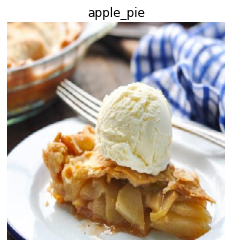

In [176]:
images = []
images.append('applepie.jpg')
predict_class(model, images, True)

Hurrah! After 6 hours of training period for just 3 classes and 10 epochs, I think it paid off. You can further try with ResNet50 or even bigger ConvNets like DenseNet121 with larger epochs over all 101 classes.